# Lecture 3: Model Tuning

  ### - Model evluation
  ### - Hyperparameter tuning


## Classification with RandomForestClassifier 

**Dataset: Iris Flowers**

**Description:**

In this lecture, we will work with the **Iris Flowers dataset**, which contains data about **three different species of iris flowers**. 

Our **task** is to build a **RandomForest model** to **classify iris flowers** into their respective species based on **features** such as **sepal length**, **sepal width**, **petal length**, and **petal width**. Follow these steps:

### 1. Load the Data: Use the load_iris() function from scikit-learn to load the dataset.

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np

# Load the Iris Flowers dataset
data = load_iris()
X = pd.DataFrame(data.data)
y = pd.DataFrame(data.target)
y.shape


(150, 1)

In [2]:
#flatten the DataFrame array into a one-dimensional Numpy array. 
#So, if the label (y) was a 2D array with shape (n, 1), it will become a 1D array with shape (n,) for machine learning algorithm
y1 = np.array(y).reshape(-1)
print(y1.shape)

(150,)


### 2. Data Exploration: Explore the dataset by displaying basic statistics and visualizations to understand the data.

In [3]:
# Display basic statistics and information about the dataset
print("Dataset Info:")
print(X.info())

# Display summary statistics for the numerical columns
print("\nSummary Statistics:")
print(X.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None

Summary Statistics:
                0           1           2           3
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.057333    3.758000    1.199333
std      0.828066    0.435866    1.765298    0.762238
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000


### 3. Split the Data: Split the data into training and testing sets.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42)


### 4. Data Preprocessing: Handle any missing values or data transformations necessary.

In [5]:
# Handle missing values 
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Identify and encode categorical columns (if any)
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# You can use one-hot encoding or label encoding depending on the nature of your data
# Example using one-hot encoding:
X_train = pd.get_dummies(X_train, columns=categorical_features, drop_first=True) # drop_first=True helps in creating a minimal, non-redundant representation of categorical features for modeling.
X_test = pd.get_dummies(X_test, columns=categorical_features, drop_first=True)

# Perform feature scaling (Min-Max scaling)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### 5. RandomForestClassifier: Train a RandomForest Classifier model on the training data for the multi-class classification problem.

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train_scaled, y_train)
 


RandomForestClassifier(random_state=42)

## 6. Evaluation: Evaluate the model's classification performance on the test data using metric accuracy.

In [8]:
# Predict target values on the test set
y_pred = model.predict(X_train_scaled)

# Calculate accuracy as a measure of model performance
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train, y_pred)

print(f"Logistic Regression Model Accuracy: {accuracy:.2%}")


Logistic Regression Model Accuracy: 100.00%


As we saw earlier, you don't want to **touch** the **test set** until you are ready to lunch a model you are confident about.

You need to use part of the **training set** for training and part of it for **model validation**.

## Problem
As there is never enough data to train your model, removing a part of it for validation poses a problem of **underfitting**. By reducing the training data, we risk losing important patterns/ trends in data set, which in turn increases error induced by bias. 

<div>
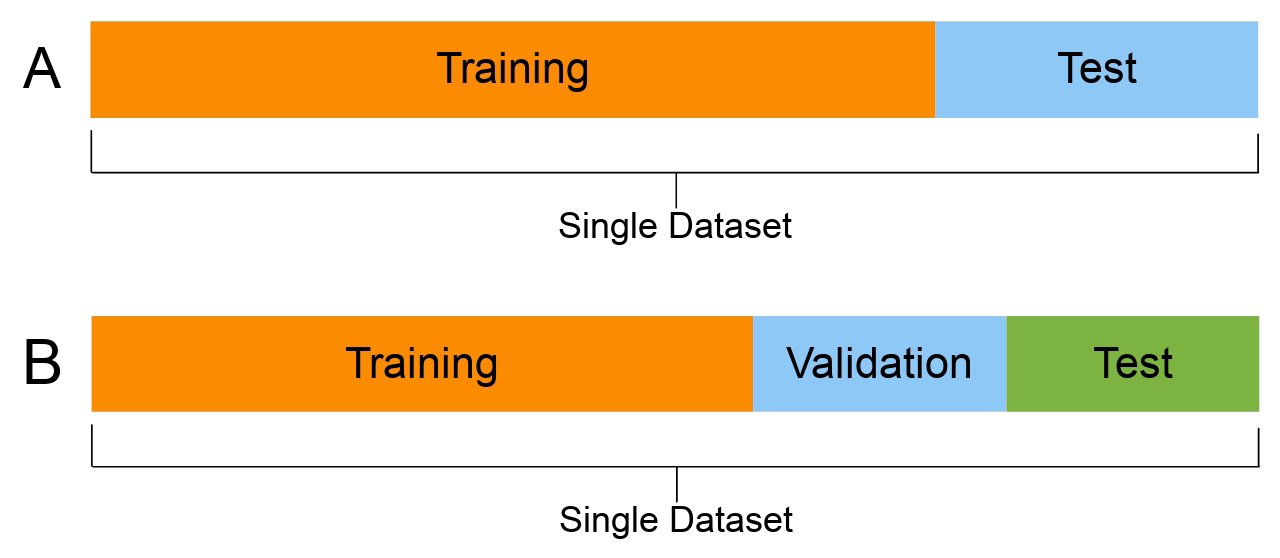
</div>

So, what we require is a method that provides ample data for training the model and also leaves ample data for validation. **K-Fold cross-validation** does exactly that.


## Better Evaluation Using K-Fold Cross Validation
In K Fold cross validation, the trainig data is divided into ***k*** subsets. Now, the holdout method is repeated ***k*** times, such that each time, one of the ***k*** subsets is used as the validation (or test) set and the other ***k-1*** subsets are put together to form a training set. The error estimation is averaged over all ***k*** trials to get total effectiveness of our model. In this case, every data point gets to be in a validation set exactly once, and gets to be in a training set ***k-1*** times.
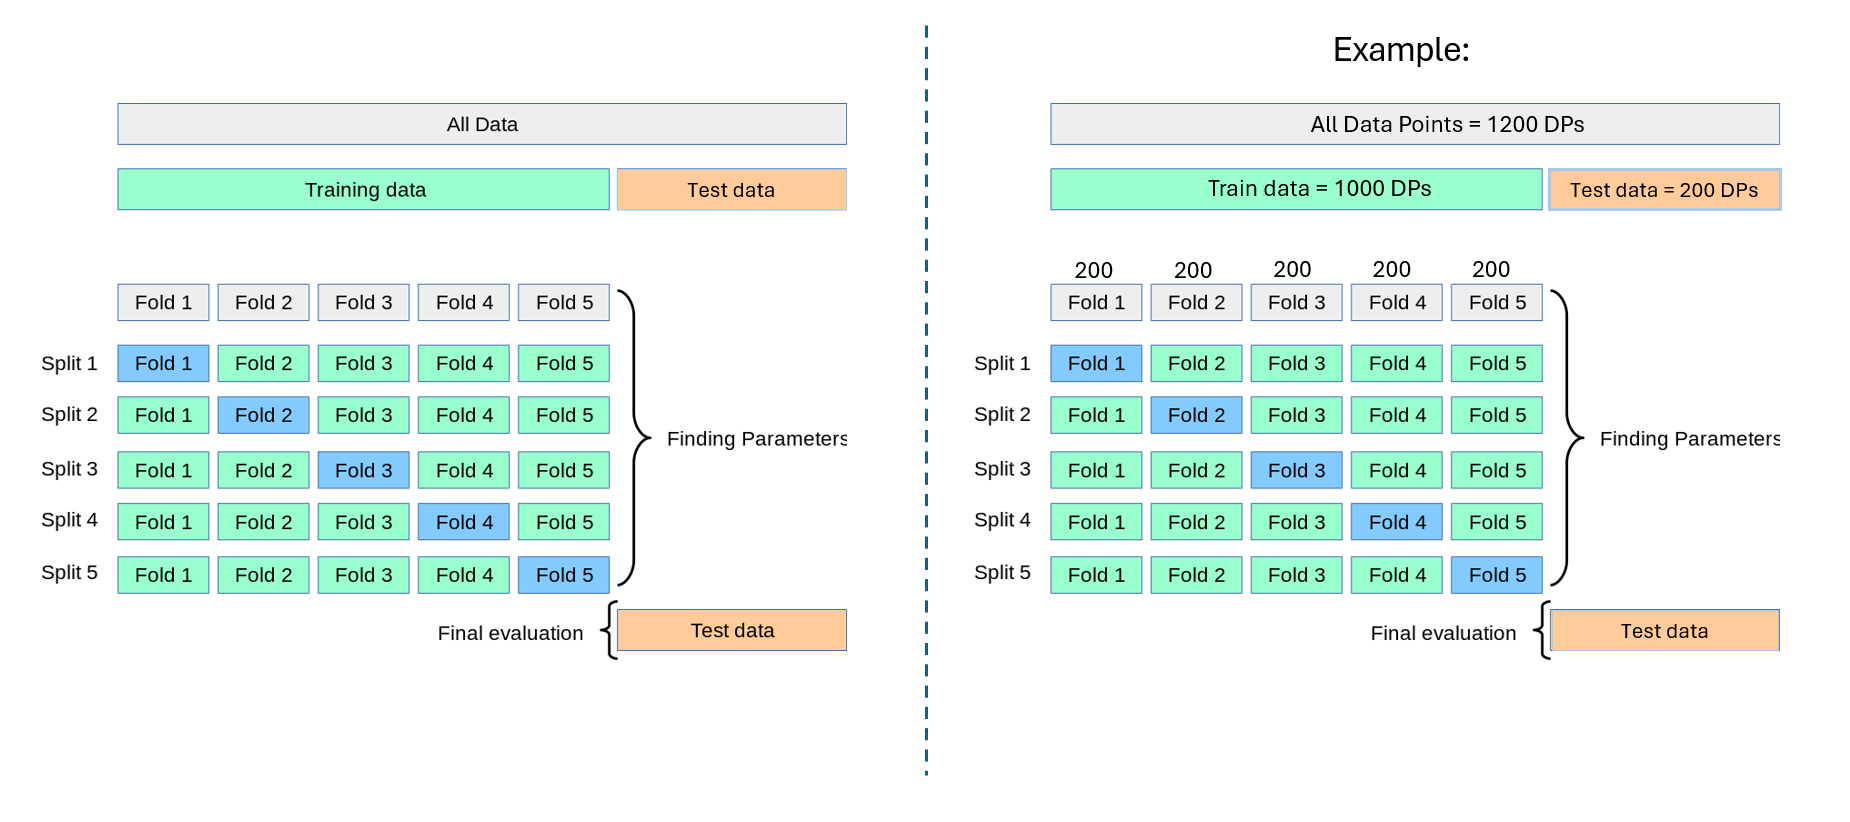

So, we can use **Scikit-Learn’s K-fold cross-validation**  feature and set the **cv** parametter to the numbers of folds, (e.g., k=3). The following code randomly **splits** the training set into **3 distinct subsets** called **folds**, then it trains and evaluates the Decision Tree model **3 times**, picking **a different fold** for evaluation every time and training on the **other 2 folds**. The result is an array containing the **3 evaluation scores**:

In [9]:
from sklearn.model_selection import cross_val_score


model_cv = RandomForestClassifier()

cross_val_score ( model_cv ,  X_train_scaled, y_train ,  cv = 3 ,  scoring = "accuracy" )

array([0.95 , 0.925, 0.975])

# Fine-Tune Your Model

Let’s assume that you currently have a shortlist of promising models. You now need to fine-tune them. Let’s look at a few ways you can do that.



## Grid Search

**One option** would be to fiddle with the hyperparameters **manually**, until you find a great combination of hyperparameter values. 
This would be very **tedious work**, and you may not have time to explore many combinations. 

Instead,  you can get Scikit-Learn’s available optimization tools like **GridSearchCV** to search for you. 

Grid search is a traditional hyperparameter optimization method where you specify a set of hyperparameter values or a range for each hyperparameter, and it **exhaustively searches through all possible combinations of these values**. 

All you need to do, when utilizing sklearn, is telling it **which hyperparameters** you want it to experiment with and **what values** to try out, and it will use **cross-validation** to **evaluate all the possible combinations** of **hyperparameter values**. 


For example, the following code searches for the best combination of hyperparameter values for the **RandomForestRegressor** :

In [12]:
from sklearn.model_selection import GridSearchCV

#initializing a list called containing dictionaries. 
#each dictionary represents a set of hyperparameters for the Random Forest model, 
#and the code will explore different combinations of these hyperparameters during grid search.
#This approach ensures that the best configuration, whether it includes bootstrapping or not, is identified based on model performance.

param_grid = [
    # try 9 (3×3) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [1, 2, 3]}, 
    # then try 4 (2×2) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3]},
  ]

# initializing a Random Forest classifier model called model_grid with a fixed random seed (random_state) to ensure reproducibility.
model_grid = RandomForestClassifier(random_state=42)
# building the GridSearch object across 5 folds, that's a total of (9+4)*5= 65 rounds of training 
grid_search = GridSearchCV(model_grid, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)
# training the model: fits the grid_search object to the training data, running the grid search and cross-validation process to find the best combination of hyperparameters for the Random Forest model.
grid_search.fit(X_train_scaled, y_train)



GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_features': [1, 2, 3],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='accuracy')

The **param_grid**  tells **Scikit-Learn** to first evaluate all **3 × 3 = 9** combinations of **n_estimators**  and **max_features**  hyperparameter values specified in the first dict (you can read about these hyperparameters in Chapter 7), then try all 2 × 2 = 4 combinations of hyperparameter values in the second dict , but this time with the **bootstrap**  hyperparameter set to **False**  instead of True  (which is the default value for this hyperparameter). 

Bootstrapping in Random Forests means that each tree in the forest is trained on a random subset of the training data, with replacement. 
So, each tree sees a slightly different version of the data. This helps create a variety of trees, which, when combined, often lead to a stronger, more generalized model.

When you have no idea what value a hyperparameter should have, a simple approach is to try out consecutive powers of 10 (or a smaller number if you want a more fine-grained search, as shown in our example with the n_estimators  hyperparameter).

The best hyperparameter combination found:

In [14]:
# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Print the accuracy of the best model on the cross-validation set
print("Best cross-validation accuracy:", grid_search.best_score_)



Best parameters: {'max_features': 2, 'n_estimators': 10}
Best cross-validation accuracy: 0.95


## Hyperparameter Optimization Checklist:
1. Manual Search
2. Grid Search
3. Randomized Search
4. Halving Grid Search
5. Halving Randomized Search
6. HyperOpt-Sklearn
7. Bayes Search
8. Meta-heuristic methods, such as Genetic Algorithm, ICA, PSO

## Performance Measurments

## Confusion Matrix
A  much better way to evaluate the performance of a classifier is to look at the confusion matrix . 

In the field of machine learning and specifically the problem of statistical classification, a confusion matrix is a **specific table layout that allows visualization of the performance of an algorithm**, typically a supervised learning one.

Each **row** of the matrix represents the **instances in an actual class** while each **column** represents the **instances in a predicted class**, or vice versa – both variants are found in the literature. The name stems from the fact that it makes it easy to see **whether the system is confusing two classes** (i.e., 
commonly mislabeling one as another).



The general idea is to count the number of times instances of class A are classified as class B. 

<div>
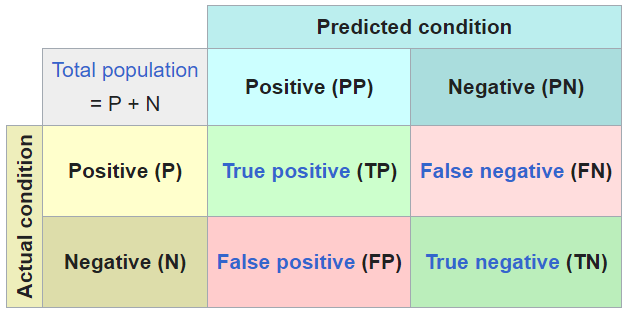
</div>

[More abput Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix)

<img src="CM2.jpg" alt="image" width="60%" height="auto">

<div>
<img src="attachment:CM2.jpg" width="500"/>
</div>

To compute the **confusion matrix**, you **first** need to have a **set of predictions** so that they can be **compared** to the **actual targets**. You could make predictions on the **test set**, **but** let’s keep it **untouched** for now (remember that you want to use the test set only at the very end of your project, once you have a classifier that you are ready to launch). Instead, you can use the **cross_val_predict()**  function:

Just like the **cross_val_score()**  function, **cross_val_predict()**  performs K-fold cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold. This means that you get a clean prediction for each instance in the training set 

In [16]:
# To abtain the y-predict vector
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(model_grid, X_train_scaled, y_train, cv=3)
  

Now you are ready to get the **confusion matrix** using the **confusion_matrix()**  function. Just pass it the **target classes** ( y_train ) and the **predicted classes** ( y_train_pred ):

In [17]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[40,  0,  0],
       [ 0, 38,  3],
       [ 0,  3, 36]], dtype=int64)

The confusion matrix gives you a lot of information, but sometimes you may prefer a more concise metric.

## Precision and Recall

An interesting one to look at is the accuracy of the positive predictions; this is called the precision  of the classifier

Precision measures how accurate your positive predictions are. It tells you what percentage of the items you labeled as positive were actually positive. 

<div>
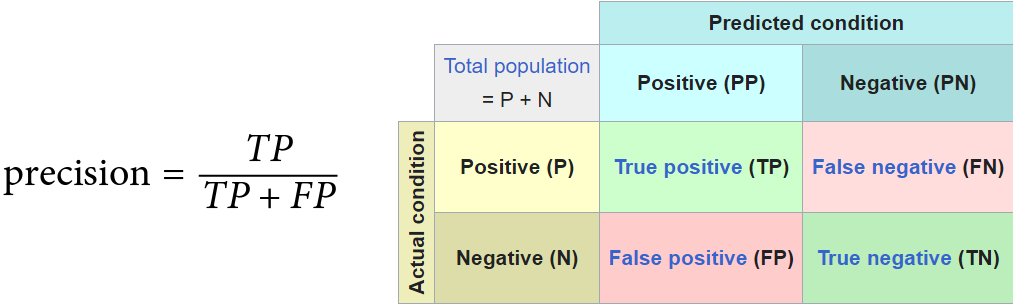
</div>



However, you could get a perfect precision score by just making one positive prediction and ensuring that it’s correct ($precision = \frac{1}{1}=100%$). But this approach would miss all other positive instances, which makes it unhelpful for identifying positives in general. So, precision is typically used along with another metric named **recall** , also called **sensitivity**  or the **true positive rate (TPR)**: this is the ratio of positive instances that are correctly detected by the classifier.

<div>
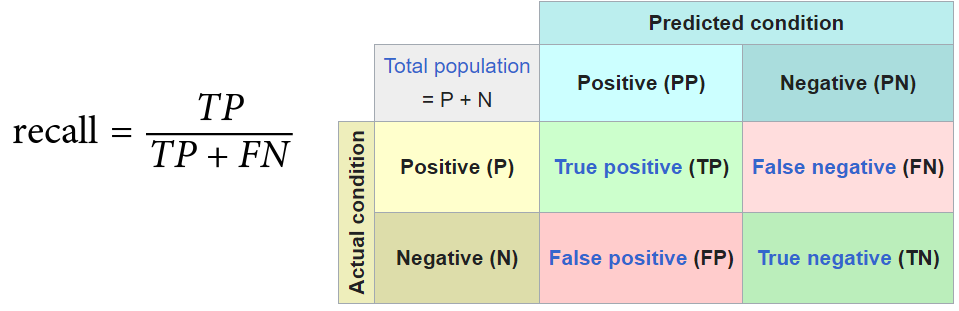
</div>



**Precision** = How many of **the predicted positives are correct?**

**Recall** = How many of **the actual positives did we catch?**

Both metrics are needed to evaluate a classifier fully because one without the other can give a misleading sense of accuracy.


**Scikit-Learn** provides several functions to compute classifier metrics, including **precision and recall**:

In [20]:
from sklearn.metrics import precision_score, recall_score

# returns the macro-averaged precision score for our multiclass classification problem
precision_score(y_train, y_train_pred, average = 'macro')


0.9499687304565354

In [22]:
recall_score(y_train, y_train_pred, average = 'macro')


0.9499687304565354

The importance of recall versus precision depends on the specific goals and consequences in different applications. Here are some examples:

 1. Applications Where Recall is More Important than Precision
- **Medical Diagnosis:** In diagnosing serious diseases (e.g., cancer screening), it’s crucial to identify all actual cases (high recall), even if it means having some false positives. Missing a case (false negative) could have severe consequences for the patient, so recall is prioritized.
- **Fraud Detection:** In financial or credit card fraud detection, it's essential to catch all potential fraud cases, even if some transactions are falsely flagged as fraudulent. High recall helps reduce the risk of missing actual fraud, which can be costly.
- **Security Screening:** In airport security or detecting cyber attacks, it’s critical to identify all potential threats. Missing a threat (low recall) can have serious consequences, so a higher recall is prioritized, even if it means some false alarms.

2. Applications Where Precision is More Important than Recall
    - **Spam Detection:** In filtering out spam emails, precision is more critical because users don’t want important emails (false positives) mistakenly flagged as spam. A high-precision spam filter ensures that emails marked as spam are truly spam.
    - **Product Recommendation Systems:** In recommending products to users, it’s more important to show relevant items (high precision) than to show all potentially interesting items. Showing irrelevant products can lead to a poor user experience, so precision is prioritized.
    - **Search Engines:** For search engines like Google, it’s essential to return the most relevant results (high precision) rather than just a large number of results. Showing irrelevant results (false positives) can frustrate users, so precision is emphasized.



In short:

**High Recall Priority:** Applications where missing an actual positive instance has severe consequences (e.g., medical diagnosis, fraud detection).

**High Precision Priority:** Applications where false positives are more problematic and should be minimized (e.g., spam detection, search engines).

Balancing recall and precision often depends on the cost of false positives versus false negatives, tailored to the specific goals and risks in each application.

It is often convenient to **combine precision and recall** into a **single metric** called  the **F1 score** , in particular if you need a simple way to compare two classifiers. The **F1  score** is the **harmonic mean**  of **precision** and **recall**.

<div>
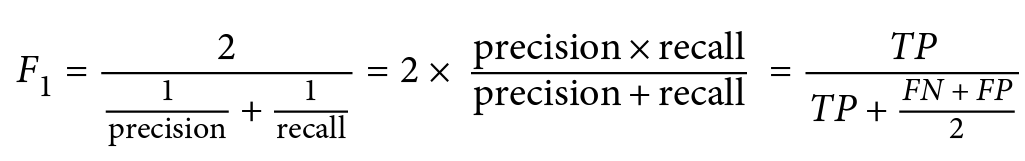
</div>

In [24]:
from sklearn.metrics import f1_score

f1_score(y_train, y_train_pred, average = 'micro')


0.9500000000000001

In f1_score, the ***average='micro'*** parameter controls **how the F1 score is calculated when there are multiple classes** (i.e., in multiclass or multilabel classification problems).

When ***average='micro'*** is used, the metric (in this case, F1 score) is computed by **counting the total true positives, false positives, and false negatives across all classes and then calculating the F1 score based on those totals**.

This method essentially treats each instance equally regardless of its class, **making it useful when you want to give equal weight to each instance rather than each class**.

## Evaluate Your System on the Test Set


Now is the time to evaluate the final model on the **test set**. There is nothing special about this process; just get the predictors and the labels from your test set, run your **full_pipeline  to transform the data** (call transform() , **not fit_transform()** —you do not want to fit the test set!), and evaluate the final model on the test set:

In [26]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(X_test)

f1_score(y_test, final_predictions, average = 'micro')


0.5333333333333333

**What???? 0.53 ????**

The difference between the training set and test set suggests that we have an **overfitting problem** here.

### Overfitting  the Training Data

Overfitting is an undesirable machine learning behavior that occurs when the machine learning model gives **accurate predictions for training data** but **not for new data**. 

An overfit model **can’t generalize well**. It means that it can give inaccurate predictions and cannot perform well for all types of new data.


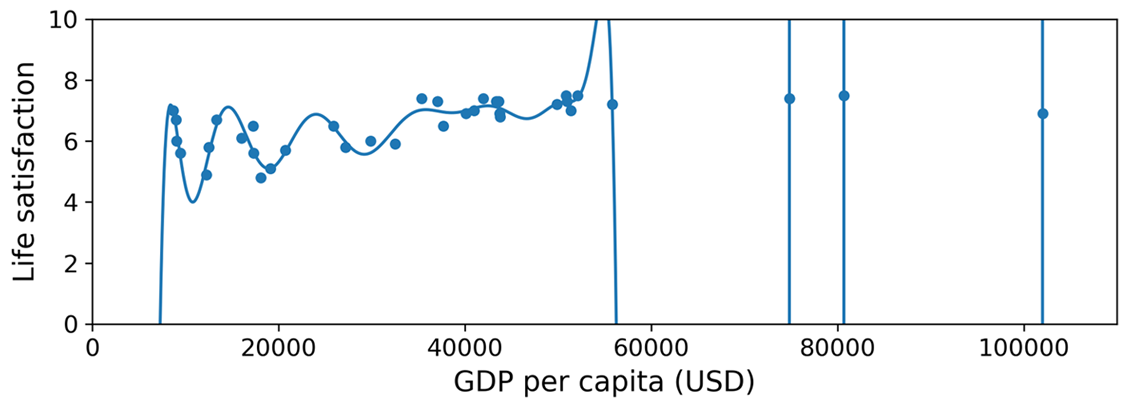

###  Overfitting happens due to several reasons, such as:
•    The training data size is too small and does not contain enough data samples to accurately represent all possible input data values.

•    The training data contains large amounts of irrelevant information, called noisy data.

•    The model trains for too long on a single sample set of data.

•    The model complexity is high, so it learns the noise within the training data.


### Solutions:
**More Data:** Increasing the size of your dataset can help the model generalize better. More data provides a broader range of examples for the model to learn from, making it less prone to overfitting.

**Cross-Validation:** Use techniques like k-fold cross-validation to assess your model's performance. Cross-validation helps you estimate how well your model will generalize to unseen data and can indicate if overfitting is occurring.

**Feature Selection:** Carefully select and reduce the number of features or input variables to focus on the most relevant ones. This can help simplify the model and reduce overfitting.

**Regularization:** Apply regularization techniques, These techniques can help prevent overfitting by reducing the complexity of the model.

**Simpler Models:** Consider using simpler models with fewer parameters. For example, if you're using a complex model like a deep neural network, you can reduce the number of layers or neurons.

**Hyperparameter Tuning:** Optimize your model's hyperparameters, such as learning rate, dropout rate, or the number of trees in an ensemble, to find the right balance between underfitting and overfitting.

**Early Stopping:** Implement early stopping during the training process. Monitor the model's performance on a validation set and stop training when the performance starts to degrade.

**Collect More Diverse Data:** Ensure that your training data is representative of the real-world scenarios your model will encounter. Collecting data from diverse sources and conditions can help the model generalize better.




### Underfitting in Machine Learning

A statistical model or a machine learning algorithm is said to have underfitting when **a model is too simple to capture data complexities**. It represents the inability of the model to learn the training data effectively result in poor performance both on the training and testing data. 

To address underfitting problem of the model, we need to use **more complex models**, with **enhanced feature representation**, and **less regularization**.

<img src= "uo.jpg">

### Techniques to Reduce Underfitting

 - Increase model complexity.
 - Increase the number of features, performing feature engineering.
 - Remove noise from the data.
 - Increase the number of epochs or increase the duration of training to get better results.

## Thank you and good luck with your last assignment